In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Predictive-Analytics-and-Data-Exploration-Projects\Datasets\london_merged.csv")

In [3]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [6]:
data['is_holiday'].value_counts(normalize=True)

is_holiday
0.0    0.977949
1.0    0.022051
Name: proportion, dtype: float64

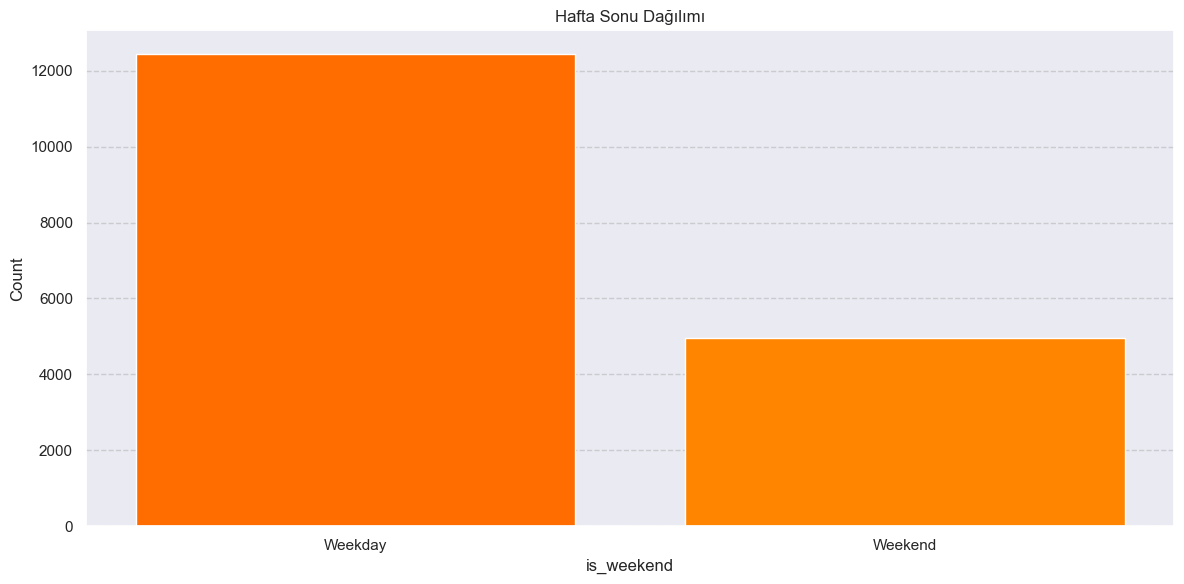

Frekans Tablosu:


,is_weekend,Count
0,Weekday,12444
1,Weekend,4970


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# DEĞİŞKENLERİ AYARLA (Özelleştirin)
# ----------------------
column_name = "is_weekend"  # Analiz edilecek sütun
title = "Hafta Sonu Dağılımı"  # Grafik başlığı
palette = {'Weekday': '#ff6d00', 'Weekend': '#ff8500'}  # Güncellenmiş renk paleti
edge_color = "white"  # Çubuk kenarlık rengi
figsize = (12, 6)  # Grafik boyutu
grid_style = {"axis": "y", "linestyle": "--", "alpha": 0.3, "color": "gray"}
# ----------------------

# Hafta sonu/içi etiketlemesi yap
data[column_name] = data[column_name].map({0.0: 'Weekday', 1.0: 'Weekend'})

# Grafik stilini ve boyutunu ayarla
sns.set(style="dark")
plt.figure(figsize=figsize)

# 1. Sütunun frekanslarını hesapla
value_counts = (
    data[column_name]
    .value_counts()
    .rename_axis(column_name)
    .reset_index(name="Count")
)

# 3. Çubuk grafik oluştur (Palet renklerini kullan)
# Her bir değer için renkleri belirle
bar_colors = [palette[val] for val in value_counts[column_name]]  # Güncellenmiş renk ataması

plt.bar(
    value_counts[column_name], 
    value_counts["Count"], 
    color=bar_colors,
    edgecolor=edge_color
)

plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(title)

# 4. Grid çizgilerini ekle
plt.grid(**grid_style)

# 5. Grafiği göster
plt.tight_layout()
plt.show()

# Frekansları konsola yazdır
print("Frekans Tablosu:")
value_counts

In [8]:
data['is_weekend'] = (data['is_weekend'] == 'Weekend').astype(int)

In [9]:
data['is_weekend'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_weekend, dtype: int32

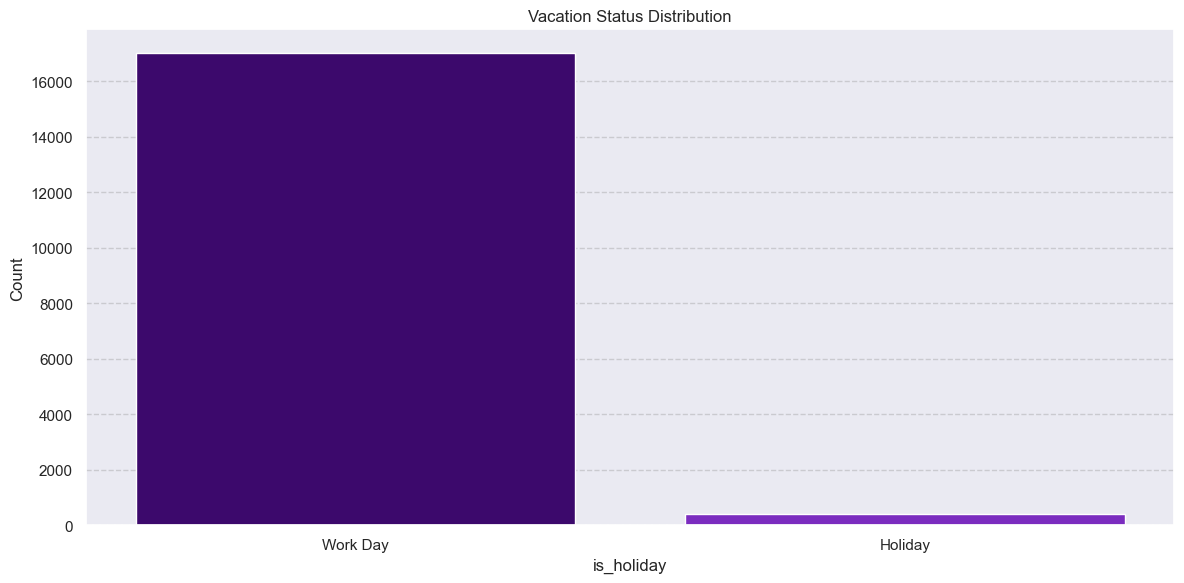

Frekans Tablosu:


,is_holiday,Count
0,Work Day,17030
1,Holiday,384


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# DEĞİŞKENLERİ AYARLA (Özelleştirin)
# ----------------------
column_name = "is_holiday"  # Analiz edilecek sütun
title = "Vacation Status Distribution"  # Grafik başlığı
palette = {'Work Day': '#3c096c', 'Holiday': '#7b2cbf'}  # Güncellenmiş renk paleti
edge_color = "white"  # Çubuk kenarlık rengi
figsize = (12, 6)  # Grafik boyutu
grid_style = {"axis": "y", "linestyle": "--", "alpha": 0.3, "color": "gray"}
# ----------------------

# Hafta sonu/içi etiketlemesi yap
data[column_name] = data[column_name].map({0.0: 'Work Day', 1.0: 'Holiday'})

# Grafik stilini ve boyutunu ayarla
sns.set(style="dark")
plt.figure(figsize=figsize)

# 1. Sütunun frekanslarını hesapla
value_counts = (
    data[column_name]
    .value_counts()
    .rename_axis(column_name)
    .reset_index(name="Count")
)

# 3. Çubuk grafik oluştur (Palet renklerini kullan)
# Her bir değer için renkleri belirle
bar_colors = [palette[val] for val in value_counts[column_name]]  # Güncellenmiş renk ataması

plt.bar(
    value_counts[column_name], 
    value_counts["Count"], 
    color=bar_colors,
    edgecolor=edge_color
)

plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(title)

# 4. Grid çizgilerini ekle
plt.grid(**grid_style)

# 5. Grafiği göster
plt.tight_layout()
plt.show()

# Frekansları konsola yazdır
print("Frekans Tablosu:")
value_counts

In [11]:
data['is_holiday'] = (data['is_holiday'] == 'Holiday').astype(int)

In [12]:
data['is_holiday'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_holiday, dtype: int32

In [13]:
data["season"].value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [14]:
#"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

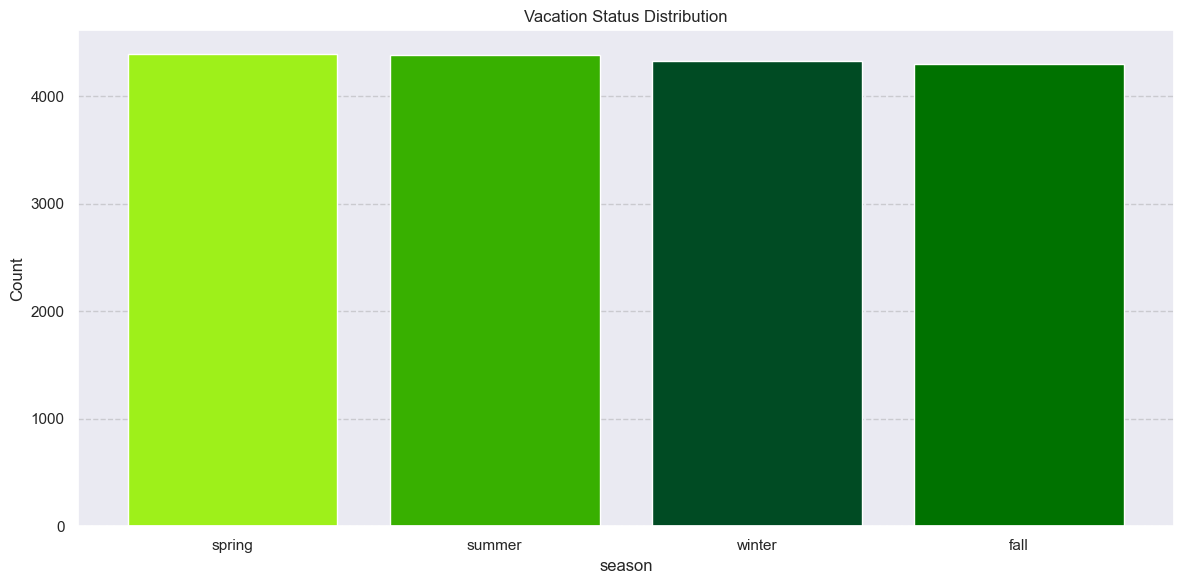

Frekans Tablosu:


,season,Count
0,spring,4394
1,summer,4387
2,winter,4330
3,fall,4303


In [15]:
# ----------------------
# DEĞİŞKENLERİ AYARLA (Özelleştirin)
# ----------------------
column_name = "season"  # Analiz edilecek sütun
title = "Vacation Status Distribution"  # Grafik başlığı
palette = {'spring': '#9ef01a', 'summer': '#38b000', 'fall' : '#007200', 'winter': '#004b23'}  # Güncellenmiş renk paleti
edge_color = "white"  # Çubuk kenarlık rengi
figsize = (12, 6)  # Grafik boyutu
grid_style = {"axis": "y", "linestyle": "--", "alpha": 0.3, "color": "gray"}
# ----------------------

# Hafta sonu/içi etiketlemesi yap
data[column_name] = data[column_name].map({0.0: 'spring', 1.0: 'summer', 2.0: 'fall', 3.0: 'winter'})

# Grafik stilini ve boyutunu ayarla
sns.set(style="dark")
plt.figure(figsize=figsize)

# 1. Sütunun frekanslarını hesapla
value_counts = (
    data[column_name]
    .value_counts()
    .rename_axis(column_name)
    .reset_index(name="Count")
)

# 3. Çubuk grafik oluştur (Palet renklerini kullan)
# Her bir değer için renkleri belirle
bar_colors = [palette[val] for val in value_counts[column_name]]  # Güncellenmiş renk ataması

plt.bar(
    value_counts[column_name], 
    value_counts["Count"], 
    color=bar_colors,
    edgecolor=edge_color
)

plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(title)

# 4. Grid çizgilerini ekle
plt.grid(**grid_style)

# 5. Grafiği göster
plt.tight_layout()
plt.show()

# Frekansları konsola yazdır
print("Frekans Tablosu:")
value_counts

In [16]:
data['season'] = pd.Categorical(data['season'], categories=['spring', 'summer', 'fall', 'winter'], ordered=True)

In [17]:
data['season'].head()

0    winter
1    winter
2    winter
3    winter
4    winter
Name: season, dtype: category
Categories (4, object): ['spring' < 'summer' < 'fall' < 'winter']

In [18]:
data["weather_code"].value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

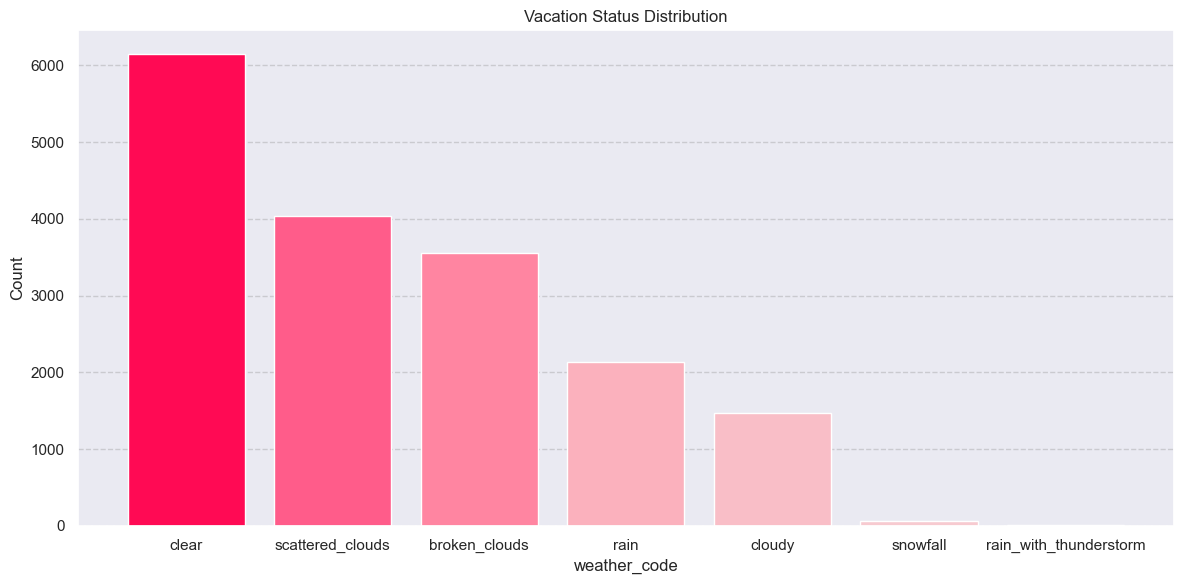

Frekans Tablosu:


,weather_code,Count
0,clear,6150
1,scattered_clouds,4034
2,broken_clouds,3551
3,rain,2141
4,cloudy,1464
5,snowfall,60
6,rain_with_thunderstorm,14


In [19]:
# ----------------------
# DEĞİŞKENLERİ AYARLA (Özelleştirin)
# ----------------------
column_name = "weather_code"  # Analiz edilecek sütun
title = "Vacation Status Distribution"  # Grafik başlığı
palette = {'clear': '#ff0a54', 'scattered_clouds': '#ff5c8a', 'broken_clouds' : '#ff85a1', 'rain': '#fbb1bd', 'cloudy': '#f9bec7', 'snowfall': '#f7cad0', 'rain_with_thunderstorm': '#fae0e4'}  # Güncellenmiş renk paleti
edge_color = "white"  # Çubuk kenarlık rengi
figsize = (12, 6)  # Grafik boyutu
grid_style = {"axis": "y", "linestyle": "--", "alpha": 0.3, "color": "gray"}
# ----------------------

# Hafta sonu/içi etiketlemesi yap
data[column_name] = data[column_name].map({1.0: 'clear', 2.0: 'scattered_clouds', 3.0: 'broken_clouds', 7.0: 'rain', 4.0: 'cloudy', 26.0: 'snowfall', 10.0: 'rain_with_thunderstorm'})

# Grafik stilini ve boyutunu ayarla
sns.set(style="dark")
plt.figure(figsize=figsize)

# 1. Sütunun frekanslarını hesapla
value_counts = (
    data[column_name]
    .value_counts()
    .rename_axis(column_name)
    .reset_index(name="Count")
)

# 3. Çubuk grafik oluştur (Palet renklerini kullan)
# Her bir değer için renkleri belirle
bar_colors = [palette[val] for val in value_counts[column_name]]  # Güncellenmiş renk ataması

plt.bar(
    value_counts[column_name], 
    value_counts["Count"], 
    color=bar_colors,
    edgecolor=edge_color
)

plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(title)

# 4. Grid çizgilerini ekle
plt.grid(**grid_style)

# 5. Grafiği göster
plt.tight_layout()
plt.show()

# Frekansları konsola yazdır
print("Frekans Tablosu:")
value_counts

In [20]:
data['weather_code'] = pd.Categorical(data['weather_code'], categories=['clear', 'scattered_clouds', 'broken_clouds', 'rain', 'cloudy', 'snowfall', 'rain_with_thunderstorm'], ordered=False)

In [21]:
data['weather_code'].head()

0    broken_clouds
1            clear
2            clear
3            clear
4            clear
Name: weather_code, dtype: category
Categories (7, object): ['clear', 'scattered_clouds', 'broken_clouds', 'rain', 'cloudy', 'snowfall', 'rain_with_thunderstorm']

In [22]:
# Timestamp'ı datetime formatına dönüştür (güvenli şekilde)
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Tarih/saat bileşenlerini çıkar (dt accessor kullanarak)
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour



In [23]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,broken_clouds,0,1,winter,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,clear,0,1,winter,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,clear,0,1,winter,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,clear,0,1,winter,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,clear,0,1,winter,2015,1,4,4


In [25]:
import numpy as np

In [26]:
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

In [27]:
# Alternatif: Vektörel operasyonla hızlı hesaplama (NaN atama)
data['wind/hum'] = data['wind_speed'] / data['hum'].replace(0, np.nan)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# 1. Compute the Correlation Matrix
# -----------------------------
# Identify numeric columns in the DataFrame 'data'
numeric_columns = data.select_dtypes(include=['number']).columns

# Compute and round the correlation matrix to 3 decimal places
correlation_matrix = data[numeric_columns].corr().round(3)

# -----------------------------
# 2. Reshape the Correlation Matrix to Long Format
# -----------------------------
# Reset the index and melt the correlation matrix for easier manipulation
correlation_df = correlation_matrix.reset_index().melt(
    id_vars=['index'],
    var_name='Karşılaştırılan Özellik',
    value_name='Korelasyon Değeri'
)
# Rename the index column to 'Özellikler'
correlation_df.rename(columns={'index': 'Özellikler'}, inplace=True)

# -----------------------------
# 3. Enhance the Correlation DataFrame
# -----------------------------
# Filter out self-comparisons (where a feature is compared with itself)
correlation_analysis = correlation_df.query('Özellikler != `Karşılaştırılan Özellik`').copy()

# Calculate the absolute correlation value
correlation_analysis['Mutlak_Korelasyon'] = correlation_analysis['Korelasyon Değeri'].abs()

# Create a feature pair identifier. This ensures that the pair A ↔ B is the same as B ↔ A.
condition = correlation_analysis['Özellikler'] < correlation_analysis['Karşılaştırılan Özellik']
correlation_analysis['Özellik_Çifti'] = np.where(
    condition,
    correlation_analysis['Özellikler'] + ' ↔ ' + correlation_analysis['Karşılaştırılan Özellik'],
    correlation_analysis['Karşılaştırılan Özellik'] + ' ↔ ' + correlation_analysis['Özellikler']
)

# Calculate the explained variance (in percentage) based on the correlation
correlation_analysis['Açıklanan_Varyans'] = (correlation_analysis['Korelasyon Değeri'] ** 2 * 100).round(1)

# Categorize the relationship strength based on absolute correlation
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Çok Zayıf', 'Zayıf', 'Orta', 'Güçlü', 'Çok Güçlü']
correlation_analysis['İlişki_Gücü'] = pd.cut(
    correlation_analysis['Mutlak_Korelasyon'],
    bins=bins,
    labels=labels,
    right=False
)

# -----------------------------
# 4. Select the Top 10 Unique Correlation Pairs
# -----------------------------
# Remove duplicate feature pairs, sort by the absolute correlation, and select the top 10
unique_correlations = (
    correlation_analysis
    .drop_duplicates('Özellik_Çifti')
    .sort_values('Mutlak_Korelasyon', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# -----------------------------
# 5. Display the Results with Styling
# -----------------------------
# Subset the desired columns and apply a background gradient on 'Mutlak_Korelasyon'
display(
    unique_correlations[['Özellik_Çifti', 'Korelasyon Değeri', 'Mutlak_Korelasyon', 'Açıklanan_Varyans', 'İlişki_Gücü']]
    .style
    .background_gradient(subset=['Mutlak_Korelasyon'], cmap='ocean')
    .format({
        'Korelasyon Değeri': '{:.3f}',
        'Mutlak_Korelasyon': '{:.3f}',
        'Açıklanan_Varyans': '{:.1f}%',
    })
)

,Özellik_Çifti,Korelasyon Değeri,Mutlak_Korelasyon,Açıklanan_Varyans,İlişki_Gücü
0,t1 ↔ t2,0.988,0.988,97.6%,Çok Güçlü
1,wind/hum ↔ wind_speed,0.893,0.893,79.7%,Çok Güçlü
2,hour ↔ hour_sin,-0.776,0.776,60.2%,Güçlü
3,hum ↔ wind/hum,-0.620,0.620,38.4%,Güçlü
4,cnt ↔ hour_cos,-0.478,0.478,22.8%,Orta
5,cnt ↔ hum,-0.463,0.463,21.4%,Orta
6,hum ↔ t1,-0.448,0.448,20.1%,Orta
7,hum ↔ t2,-0.403,0.403,16.2%,Orta
8,cnt ↔ t1,0.389,0.389,15.1%,Zayıf
9,hour_sin ↔ hum,0.377,0.377,14.2%,Zayıf


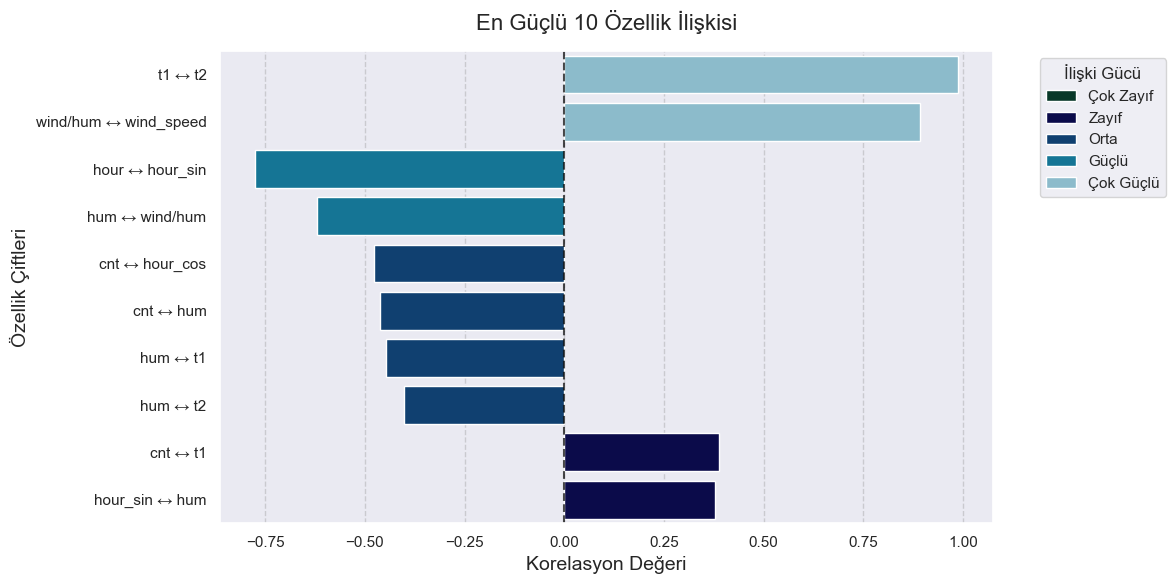

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme için figür ve eksen oluştur
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    x='Korelasyon Değeri',  
    y='Özellik_Çifti', 
    data=unique_correlations,  
    hue='İlişki_Gücü',  
    palette="ocean",  # Belirlediğimiz renkler kullanılıyor
    dodge=False,  
    edgecolor='white',  
    ax=ax
)

# x=0 referans çizgisi
ax.axvline(0, color='black', linestyle='--', alpha=0.7)

# Yatay grid çizgileri ekleyelim
ax.grid(axis='x', linestyle='--', alpha=0.3, color='gray')

# Grafik başlığı ve etiketler
ax.set_title('En Güçlü 10 Özellik İlişkisi', pad=15, fontsize=16)
ax.set_xlabel('Korelasyon Değeri', fontsize=14)
ax.set_ylabel('Özellik Çiftleri', fontsize=14)

# Legend pozisyonunu ayarlayalım
ax.legend(title='İlişki Gücü', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafik düzenini sıkıştırarak kenar taşmalarını önleyelim
plt.tight_layout()

# Grafiği göster
plt.show()

In [30]:
data['t_mean'] = data[['t1', 't2']].mean(axis=1)
data = data.drop(columns=['t1', 't2'])

In [31]:
corr_matrix=data.select_dtypes("number").corr()
corr_matrix

,cnt,hum,wind_speed,is_holiday,is_weekend,year,month,day,hour,hour_sin,hour_cos,wind/hum,t_mean
cnt,1.000000,-0.462901,0.116295,-0.051698,-0.096499,0.010046,0.063757,-0.017887,0.324423,-0.321620,-0.477501,0.283401,0.379169
hum,-0.462901,1.000000,-0.287789,0.032068,0.028098,0.072443,0.113149,-0.020868,-0.295653,0.376704,0.342132,-0.620434,-0.424973
wind_speed,0.116295,-0.287789,1.000000,-0.002606,0.011479,-0.094739,-0.086383,0.002040,0.141792,-0.175645,-0.222466,0.892760,0.114830
is_holiday,-0.051698,0.032068,-0.002606,1.000000,-0.094898,0.034631,-0.011511,0.042657,-0.000288,0.000345,0.000374,-0.017618,-0.041168
is_weekend,-0.096499,0.028098,0.011479,-0.094898,1.000000,0.003049,-0.005406,0.005721,0.001803,-0.002111,-0.000846,0.000202,-0.007082
year,0.010046,0.072443,-0.094739,0.034631,0.003049,1.000000,-0.026547,-0.021935,0.000542,-0.000966,0.000661,-0.107641,-0.041887
month,0.063757,0.113149,-0.086383,-0.011511,-0.005406,-0.026547,1.000000,0.012614,-0.000312,0.000255,-0.000533,-0.103537,0.353088
day,-0.017887,-0.020868,0.002040,0.042657,0.005721,-0.021935,0.012614,1.000000,-0.000310,0.000453,-0.000090,-0.000156,0.006022
hour,0.324423,-0.295653,0.141792,-0.000288,0.001803,0.000542,-0.000312,-0.000310,1.000000,-0.776062,-0.101562,0.217953,0.161168
hour_sin,-0.321620,0.376704,-0.175645,0.000345,-0.002111,-0.000966,0.000255,0.000453,-0.776062,1.000000,-0.000256,-0.285324,-0.203999


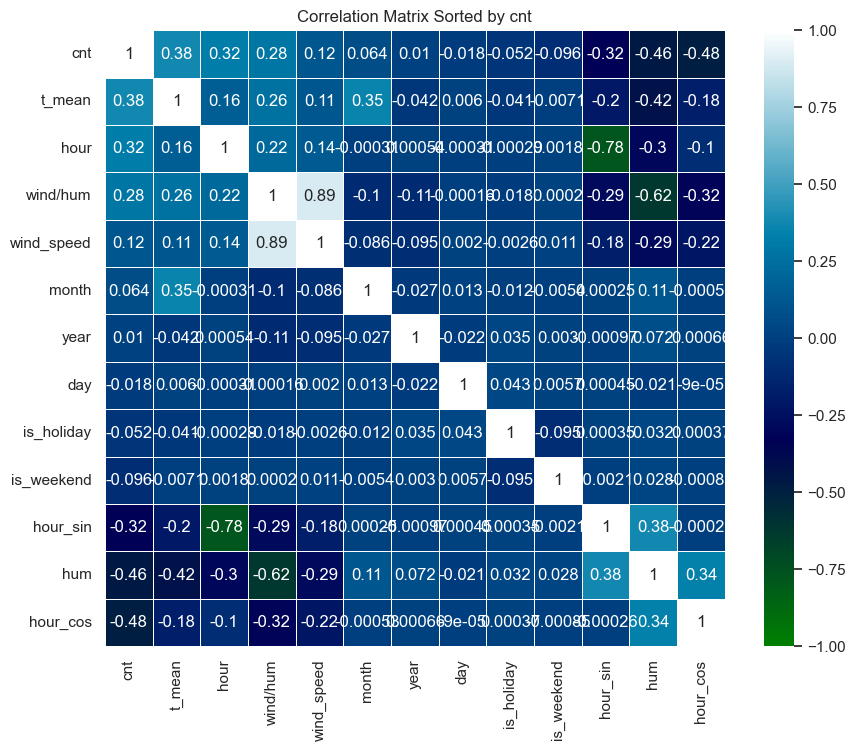

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_corr = corr_matrix['cnt'].sort_values(ascending=False)

# Korelasyon matrisinin sıralanmış sütunlarını seç
sorted_columns = sorted_corr.index

# Sıralanmış sütunlar için korelasyon matrisini yeniden oluştur
sorted_corr_matrix = data[sorted_columns].corr()

# Seaborn ile heatmap (ısı haritası) oluştur
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='ocean', vmin=-1, vmax=1, linewidths=0.5)

# Grafik başlığını ekle
plt.title('Correlation Matrix Sorted by cnt')
plt.show()